В этом ноутбуке проводится разведочный анализ данных **(EDA)** для датасета [RCSB PDB Macromolecular Structure](https://www.kaggle.com/datasets/samiraalipour/rcsb-pdb-macromolecular-structure-dataset?resource=download&select=RCSB_PDB_Macromolecular_Structure_Dataset.csv).

**Цель:** оценить качество данных по трем ключевым метрикам

1.   **Completeness** - полнота данных
2.   **Uniqueness** - уникальность записей
3. **Outlier Ratio** - доля выбросов



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

file_path = "/content/RCSB_PDB_Macromolecular_Structure_Dataset.csv"
df = pd.read_csv(file_path)

print("Размер данных:", df.shape)
df.info()
df.head()


Размер данных: (11832, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11832 entries, 0 to 11831
Data columns (total 46 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entry ID                                                      11832 non-null  object 
 1   Experimental Method                                           11832 non-null  object 
 2   Matthews Coefficient                                          11701 non-null  float64
 3   Percent Solvent Content                                       11701 non-null  float64
 4   Crystallization Method                                        11535 non-null  object 
 5   pH                                                            7783 non-null   float64
 6   Crystal Growth Procedure                                      11782 non-null  object 
 7   Temp (K)                                

,Entry ID,Experimental Method,Matthews Coefficient,Percent Solvent Content,Crystallization Method,pH,Crystal Growth Procedure,Temp (K),Deposition Date,Release Date,Number of Non-Hydrogen Atoms per Deposited Model,Total Number of Polymer Instances (Chains),Total Number of Polymer Residues per Deposited Model,Number of Water Molecules per Deposited Model,Disulfide Bond Count per Deposited Model,Molecular Weight per Deposited Model,Number of Distinct Protein Entities,Refinement Resolution (Å),Structure Determination Methodology,Average B Factor,R Free,R Work,Structure Title,Sequence,Entity Polymer Type,Polymer Entity Sequence Length,Entity Macromolecule Type,Total Number of polymer Entity Instances (Chains) per Entity,Molecular Weight (Entity),Macromolecule Name,EC Number,EC Provenance Source,Source Organism,Taxonomy ID,Total Number of Polymer Residues per Assembly,Total Number of Polymer Instances (Chains) per Assembly,Oligomeric Count,Assembly ID,Oligomeric State,Stoichiometry,Ligand ID,Ligand Formula,Ligand MW,Ligand Name,InChI,Ligand of Interest
0,6SJZ,X-RAY DIFFRACTION,2.20,44.16,"VAPOR DIFFUSION, HANGING DROP",5.5,"22% PEG6K, 100mM Sodium Citrate pH 5.5, 100mM ...",293.0,2019-08-14,2020-03-18,7209.0,4.0,822.0,596.0,NaN,97.20,2.0,1.995,experimental,27.1155,0.2016,0.1716,HsNMT1 in complex with both MyrCoA and Acetyla...,GGSEFSVGQGPAKTMEEASKRSYQFWDTQPVPKLGEVVNTHGPVEP...,Protein,402.0,polypeptide(L),2.0,46.465,Glycylpeptide N-tetradecanoyltransferase 1,2.3.1.97,PDB Primary Data,Homo sapiens,9606.0,411.0,2.0,2.0,1.0,Hetero 2-mer,"A1, B1",MYA,C35 H62 N7 O17 P3 S,977.890,TETRADECANOYL-COA,InChI=1S/C35H62N7O17P3S/c1-4-5-6-7-8-9-10-11-1...,Y
1,5C37,X-RAY DIFFRACTION,2.26,45.64,"VAPOR DIFFUSION, HANGING DROP",8.0,"PEG3350, Tris, KCl",298.0,2015-06-17,2016-06-22,9702.0,2.0,1328.0,235.0,NaN,146.72,1.0,2.3,experimental,NaN,0.2507,0.2097,Structure of the beta-ketoacyl reductase domai...,EQQVPILEKFCFTPHTEEGCLSERAALQEELQLCKGLVQALQTKVT...,Protein,664.0,polypeptide(L),2.0,72.049,Fatty acid synthase,2.3.1.85,PDB Primary Data,Homo sapiens,9606.0,664.0,1.0,1.0,1.0,Monomer,A1,NDP,C21 H30 N7 O17 P3,745.421,NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTID...,InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-17...,NaN
2,6NNA,X-RAY DIFFRACTION,2.26,45.48,"VAPOR DIFFUSION, HANGING DROP",7.6,"0.19 M ammonium sulfate, 5 mM sodium cacodylat...",291.0,2019-01-14,2019-02-20,10100.0,2.0,1320.0,594.0,NaN,147.01,1.0,2.26,experimental,34.8730,0.2508,0.2008,Human Fatty Acid Synthase Psi/KR Tri-Domain wi...,QQVPILEKFCFTPHTEEGCLSERAALQEELQLCKGLVQALQTKVTQ...,Protein,660.0,polypeptide(L),2.0,71.965,"Fatty acid synthase,Fatty acid synthase",2.3.1.85,PDB Primary Data,Homo sapiens,9606.0,660.0,1.0,1.0,1.0,Monomer,A1,NDP,C21 H30 N7 O17 P3,745.421,NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTID...,InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-17...,NaN
3,7M4C,X-RAY DIFFRACTION,2.83,56.57,"VAPOR DIFFUSION, SITTING DROP",7.5,"80-95mM BICINE pH 8.3, 0.3M Na-K Tartrate, 18-...",277.0,2021-03-21,2022-07-06,3248.0,4.0,351.0,244.0,NaN,44.09,1.0,1.95,experimental,42.1790,0.2141,0.1813,"DNA Polymerase Lambda, TTP:At Mn2+ Product Sta...",AQPSSQKATNHNLHITEKLEVLAKAYSVQGDKWRALGYAKAINALK...,Protein,329.0,polypeptide(L),1.0,36.704,DNA polymerase lambda,2.7.7.7,PDB Primary Data,Homo sapiens,9606.0,351.0,4.0,4.0,1.0,Monomer,A1,PPV,H4 O7 P2,177.975,PYROPHOSPHATE,"InChI=1S/H4O7P2/c1-8(2,3)7-9(4,5)6/h(H2,1,2,3)...",Y
4,7M4E,X-RAY DIFFRACTION,2.84,56.66,"VAPOR DIFFUSION, SITTING DROP",7.5,"80-95mM BICINE pH 8.3, 0.3M Na-K Tartrate, 18-...",277.0,2021-03-21,2022-07-06,2981.0,4.0,351.0,127.0,NaN,44.19,1.0,1.903,experimental,58.3837,0.2328,0.2086,"DNA Polymerase Lambda, dCTP:At Mg2+ Reaction S...",AQPSSQKATNHNLHITEKLEVLAKAYSVQGDKWRALGYAKAINALK...,Protein,329.0,polypeptide(L),1.0,36.736,DNA polymerase lambda,2.7.7.7,PDB Primary Data,Homo sapiens,9606.0,351.0,4.0,4.0,1.0,Monomer,A1,PPV,H4 O7 P2,177.975,PYROPHOSPHATE,"InChI=1S/H4O7P2/c1-8(2,3)7-9(4,5)6/h(H2,1,2,3)...",Y


# Completeness: измеряет долю непустых значений в каждом столбце
Норматив: ≥ 0.98


/tmp/ipython-input-1480094277.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


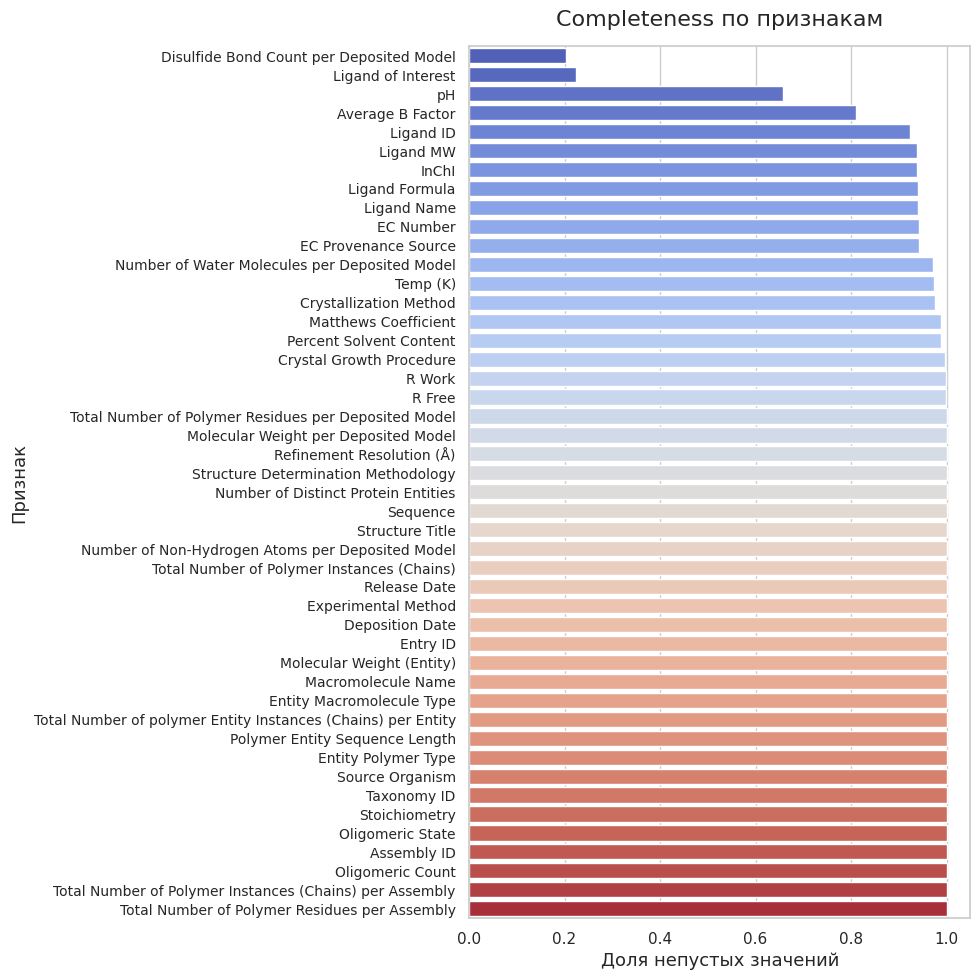

Средняя полнота данных: 0.942


In [2]:
completeness = 1 - (df.isnull().sum() / len(df))
completeness_df = completeness.reset_index()
completeness_df.columns = ['column', 'completeness']
completeness_df = completeness_df.sort_values(by='completeness', ascending=True)

plt.figure(figsize=(10, 10))
sns.barplot(
    data=completeness_df,
    x='completeness',
    y='column',
    palette='coolwarm'
)
plt.title("Completeness по признакам", fontsize=16, pad=15)
plt.xlabel("Доля непустых значений", fontsize=13)
plt.ylabel("Признак", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

avg_completeness = completeness.mean()
print(f"Средняя полнота данных: {avg_completeness:.3f}")


**Completeness (полнота данных)** показывает, насколько заполнены признаки без пропусков.
В нашем наборе данных средняя полнота составила 0.942, что ниже рекомендуемого уровня 0.98.
Это означает, что в таблице присутствует около 5.8 % пропусков в среднем по признакам.
Наибольшее количество пропусков наблюдается в признаках, связанных с физико-химическими характеристиками (например, Disulfide Bond Count per Deposited Model, pH, Average B Factor).

**Вывод:**

Полнота данных не соответствует нормативу (≥ 0.98).
Для повышения качества рекомендуется:

* удалить или заполнить сильно неполные признаки;
* использовать методы восстановления (например, медианное заполнение для числовых столбцов);
* провести анализ влияния пропусков на итоговую модель.

In [3]:
duplicate_count = df.duplicated().sum()
uniqueness_score = 1 - (duplicate_count / len(df))

print(f"Количество дубликатов: {duplicate_count}")
print(f"Оценка уникальности: {uniqueness_score:.3f}")

if duplicate_count > 0:
    duplicates = df[df.duplicated(keep=False)]
    print("Примеры дублирующихся строк:")
    display(duplicates.head())


Количество дубликатов: 0
Оценка уникальности: 1.000


Уникальность записей важна для корректного анализа, так как дубликаты искажают результаты.
В нашем наборе данных доля уникальных записей составила ≈ 1.000
Это значит, что все записи уникальны.

In [4]:
numeric_df = df.select_dtypes(include=[np.number])
outlier_ratio = {}

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = ((numeric_df[col] < lower) | (numeric_df[col] > upper)).sum()
    outlier_ratio[col] = outliers / len(df)

outlier_df = pd.DataFrame.from_dict(outlier_ratio, orient='index', columns=['outlier_ratio']).sort_values(by='outlier_ratio', ascending=False)
outlier_df.head(10)

,outlier_ratio
Temp (K),0.230815
Number of Distinct Protein Entities,0.216362
Molecular Weight per Deposited Model,0.088996
Total Number of Polymer Residues per Deposited Model,0.088066
Total Number of Polymer Residues per Assembly,0.086122
Total Number of polymer Entity Instances (Chains) per Entity,0.081897
Polymer Entity Sequence Length,0.080375
Number of Non-Hydrogen Atoms per Deposited Model,0.080291
Molecular Weight (Entity),0.062965
Total Number of Polymer Instances (Chains) per Assembly,0.049865


**Визуализация выбросов:**

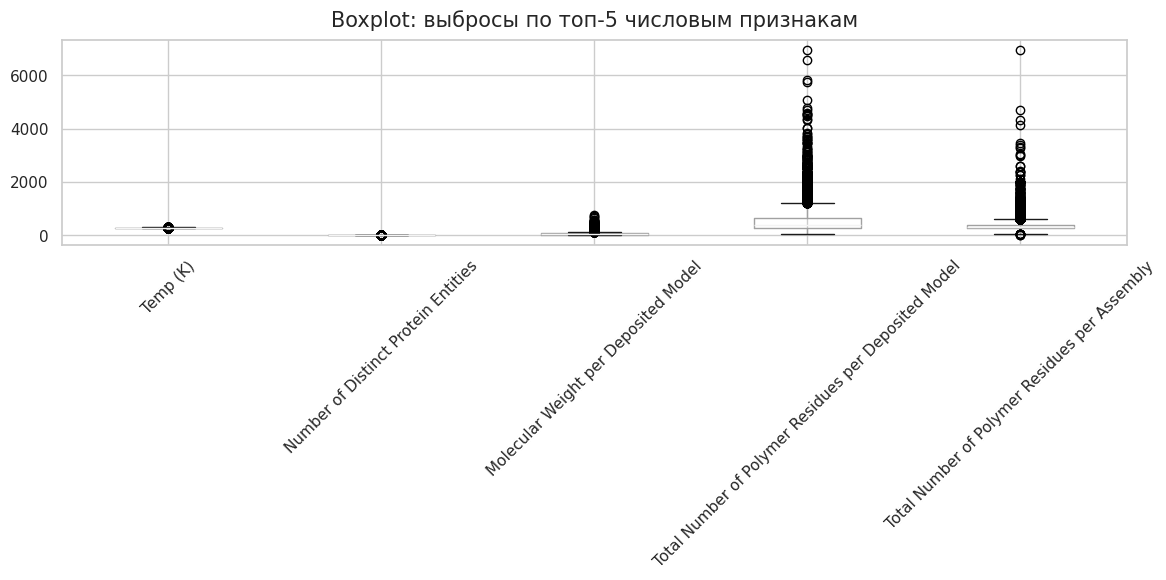

Средняя доля выбросов: 0.059


In [5]:
top_outlier_cols = outlier_df.head(5).index

plt.figure(figsize=(12,6))
df[top_outlier_cols].boxplot()
plt.title("Boxplot: выбросы по топ-5 числовым признакам", fontsize=15, pad=10)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Средний показатель
avg_outlier_ratio = outlier_df['outlier_ratio'].mean()
print(f"Средняя доля выбросов: {avg_outlier_ratio:.3f}")


**Outlier Ratio (доля выбросов)** оценивает процент экстремальных значений в числовых признаках.
Средняя доля выбросов в наборе данных составила ≈ 0.059.
Это выше рекомендуемого уровня 0.02 (2%), что указывает на наличие значительного количества аномальных наблюдений.

Наиболее чувствительные признаки:
1. Molecular Weight per Deposited Model
2. Total Number of Polymer Residues per Deposited Model
3. Total Number of Polymer Residues per Assembly

Вероятнее всего, выбросы отражают естественные различия между биомолекулами (разные размеры и массы белков),
но часть экстремальных точек может быть связана с ошибками измерения или некорректной записью.

Рекомендации:
* Провести дополнительную проверку выбросов на предмет биологической значимости.
* Рассмотреть логарифмирование или нормализацию признаков перед моделированием.
* Возможна фильтрация очевидных артефактов, если они не несут смысловой нагрузки.

In [6]:
metrics_summary = pd.DataFrame({
    'Metric': ['Completeness', 'Uniqueness', 'Outlier Ratio'],
    'Value': [avg_completeness, uniqueness_score, avg_outlier_ratio],
    'Threshold': ['≥ 0.98', '= 1.0', '≤ 0.02']
})
metrics_summary


,Metric,Value,Threshold
0,Completeness,0.942428,≥ 0.98
1,Uniqueness,1.000000,= 1.0
2,Outlier Ratio,0.059029,≤ 0.02


В целом, структура и уникальность данных хорошие, однако требуется доработка полноты (удаление или восстановление пропусков) и необходимо анализировать выбросы для отделения биологически обоснованных экстремумов от ошибок ввода.

# Избавляемся от NaN

In [26]:
nan_info = df.isna().sum()
nan_columns = nan_info[nan_info > 0]
nan_columns

,0
Matthews Coefficient,131
Percent Solvent Content,131
Crystallization Method,297
pH,4049
Crystal Growth Procedure,50
Temp (K),316
Number of Water Molecules per Deposited Model,329
Disulfide Bond Count per Deposited Model,9419
Refinement Resolution (Å),7
Average B Factor,2251


In [27]:
# здесь можно заменить на 0 - тк не у всех белков есть дисульфидные связи
df['Disulfide Bond Count per Deposited Model'] = df['Disulfide Bond Count per Deposited Model'].fillna(0)

In [29]:
# для данных значений мы можем взять медиану
median_cols = [
    'pH',
    'Temp (K)',
    'Number of Water Molecules per Deposited Model',
    'Average B Factor',
    'R Free',
    'R Work',
    'Refinement Resolution (Å)',
    'Matthews Coefficient',
    'Percent Solvent Content'
]

for col in median_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# **Визуализация**

In [30]:
sns.set_theme(style="whitegrid", palette="viridis", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)

In [31]:
df.select_dtypes(include='object').columns

Index(['Entry ID', 'Experimental Method', 'Crystallization Method',
       'Crystal Growth Procedure', 'Deposition Date', 'Release Date',
       'Structure Determination Methodology', 'Structure Title', 'Sequence',
       'Entity Polymer Type', 'Entity Macromolecule Type',
       'Macromolecule Name', 'EC Number', 'EC Provenance Source',
       'Source Organism', 'Oligomeric State', 'Stoichiometry', 'Ligand ID',
       'Ligand Formula', 'Ligand Name', 'InChI', 'Ligand of Interest'],
      dtype='object')

In [32]:
df['Refinement Resolution (Å)'] = pd.to_numeric(df['Refinement Resolution (Å)'], errors='coerce')
df['Refinement Resolution (Å)']

,Refinement Resolution (Å)
0,1.995
1,2.300
2,2.260
3,1.950
4,1.903
...,...
11827,1.380
11828,2.200
11829,2.500
11830,1.700


**Распределение молекулярной массы белка: есть ли перекос или выбросы?**

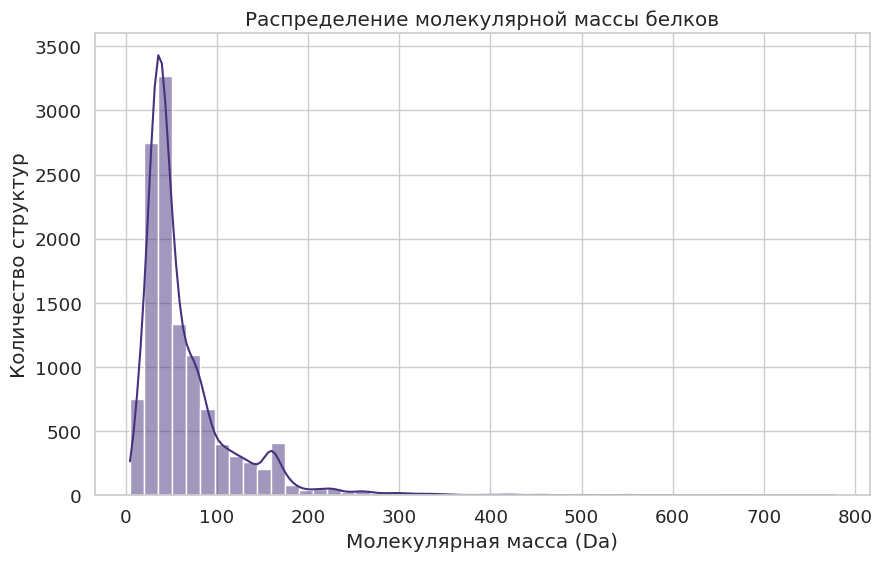

In [33]:
sns.histplot(df['Molecular Weight per Deposited Model'], bins=50, kde=True)
plt.title("Распределение молекулярной массы белков")
plt.xlabel("Молекулярная масса (Da)")
plt.ylabel("Количество структур")
plt.show()

In [39]:
from scipy.stats import kstest
import numpy as np
data = df['Molecular Weight per Deposited Model']
data_std = (data - np.mean(data)) / np.std(data)
stat, p = kstest(data_std, 'norm')

print(f'KS test: stat={stat}, p={p}')

KS test: stat=0.19210018341223045, p=0.0


Распределение ненормальное. Для более детального анализа можно применить логарифмическое преобразование, чтобы уменьшить влияние выбросов и приблизить распределение к нормальному.

**Распределение разрешений: насколько "четкие" структуры в датасете?** (разрешение - мера качества кристаллографических данныхразрешение — мера качества кристаллографических данных)

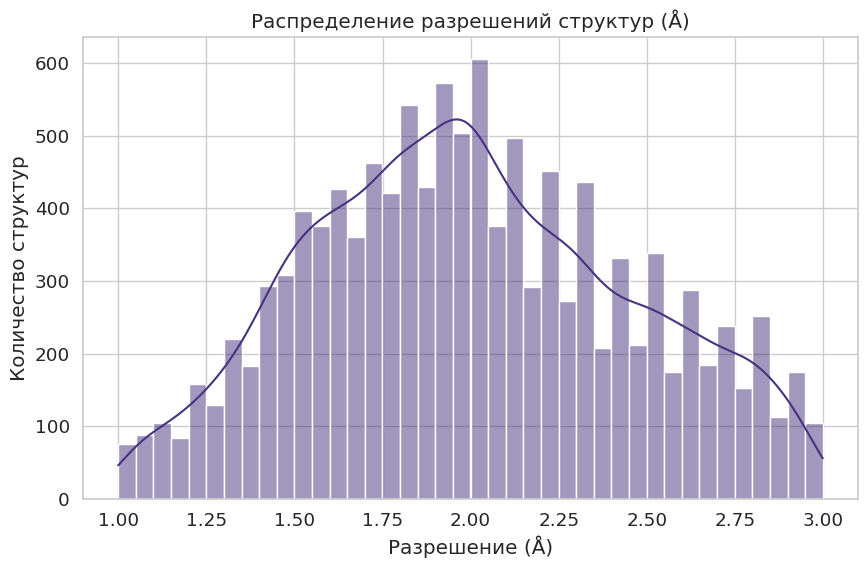

In [36]:
sns.histplot(df['Refinement Resolution (Å)'], bins=40, kde=True)
plt.title("Распределение разрешений структур (Å)")
plt.xlabel("Разрешение (Å)")
plt.ylabel("Количество структур")
plt.show()

In [40]:
from scipy.stats import kstest
import numpy as np
data = df['Refinement Resolution (Å)']
data_std = (data - np.mean(data)) / np.std(data)
stat, p = kstest(data_std, 'norm')

print(f'KS test: stat={stat}, p={p}')

KS test: stat=0.0442265623082706, p=1.50615087626622e-20


Распределение все также ненормальное. Для более детального анализа можно применить логарифмическое преобразование, чтобы уменьшить влияние выбросов и приблизить распределение к нормальному.

**Корреляции между структурными параметрами**: какие физико-химические параметры связаны?

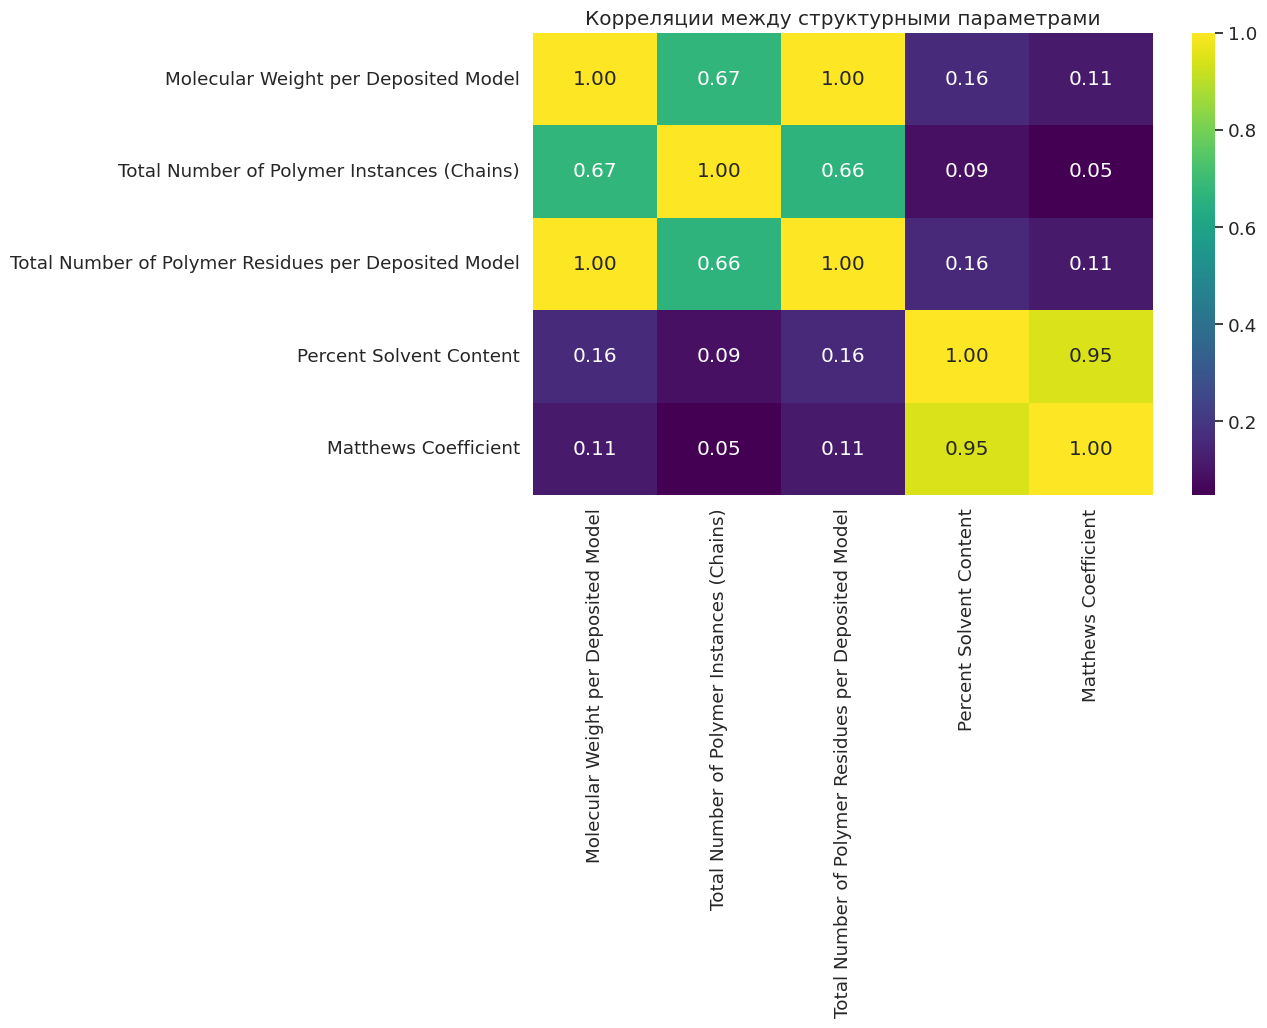

In [41]:
features = [
    'Molecular Weight per Deposited Model',
    'Total Number of Polymer Instances (Chains)',
    'Total Number of Polymer Residues per Deposited Model',
    'Percent Solvent Content',
    'Matthews Coefficient'
]

corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Корреляции между структурными параметрами")
plt.show()

**Масса и олигомерное состояние**: как масса различается у мономеров, димеров, тетрамеров и т.д.?

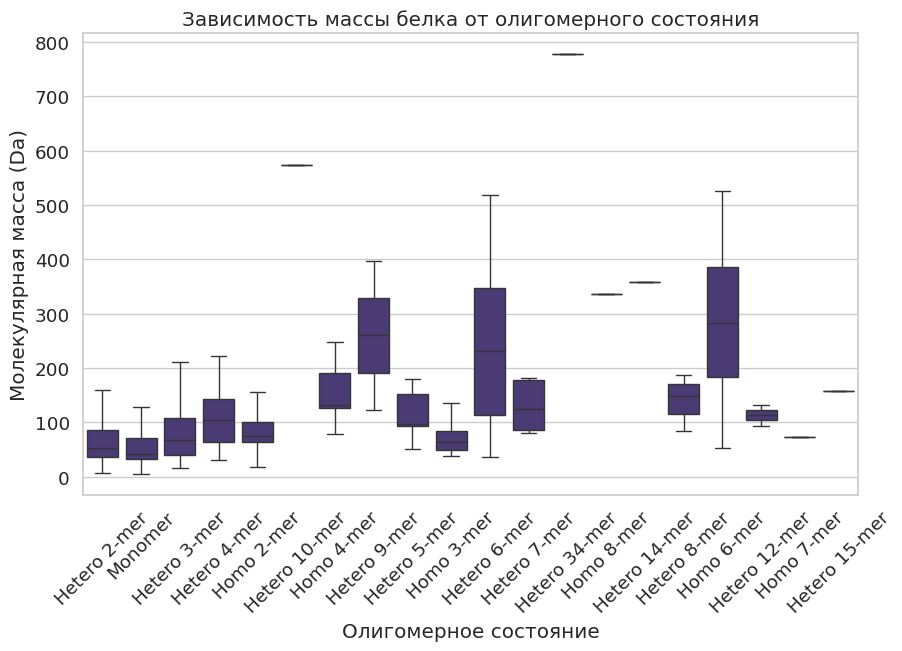

In [42]:
sns.boxplot(
    x='Oligomeric State',
    y='Molecular Weight per Deposited Model',
    data=df,
    showfliers=False
)
plt.xticks(rotation=45)
plt.title("Зависимость массы белка от олигомерного состояния")
plt.xlabel("Олигомерное состояние")
plt.ylabel("Молекулярная масса (Da)")
plt.show()

**pH кристаллизации по методу**: при каком pH чаще кристаллизуют белки и как это зависит от метода?

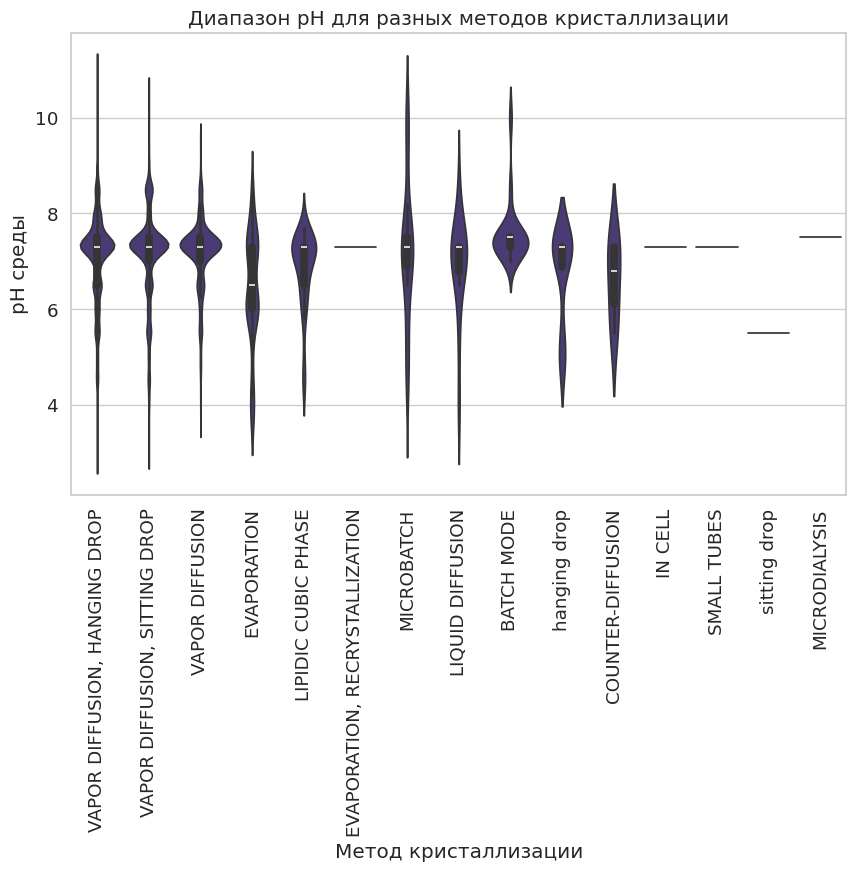

In [48]:
sns.violinplot(
    data=df,
    x='Crystallization Method',
    y='pH',
    inner='box'
)
plt.xticks(rotation=90)
plt.title("Диапазон pH для разных методов кристаллизации")
plt.xlabel("Метод кристаллизации")
plt.ylabel("pH среды")
plt.show()

**Топ-10 методов кристаллизации**

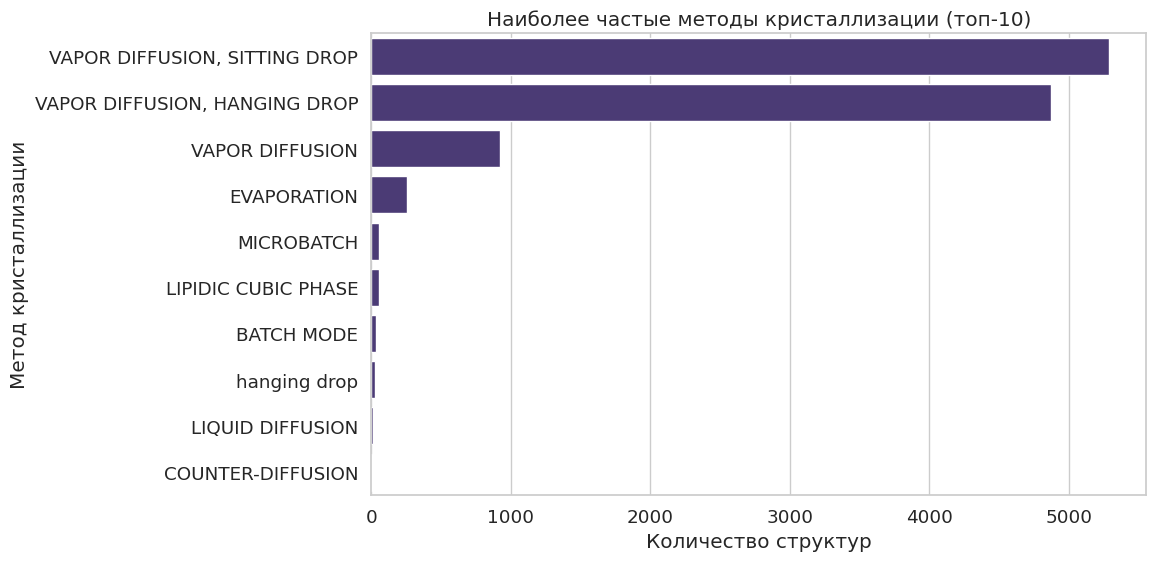

In [44]:
top_methods = df['Crystallization Method'].value_counts().index[:10]
sns.countplot(y='Crystallization Method', data=df, order=top_methods)
plt.title("Наиболее частые методы кристаллизации (топ-10)")
plt.xlabel("Количество структур")
plt.ylabel("Метод кристаллизации")
plt.show()

**Длина цепи и масса: существует ли линейная зависимость между длиной белка и его массой?**

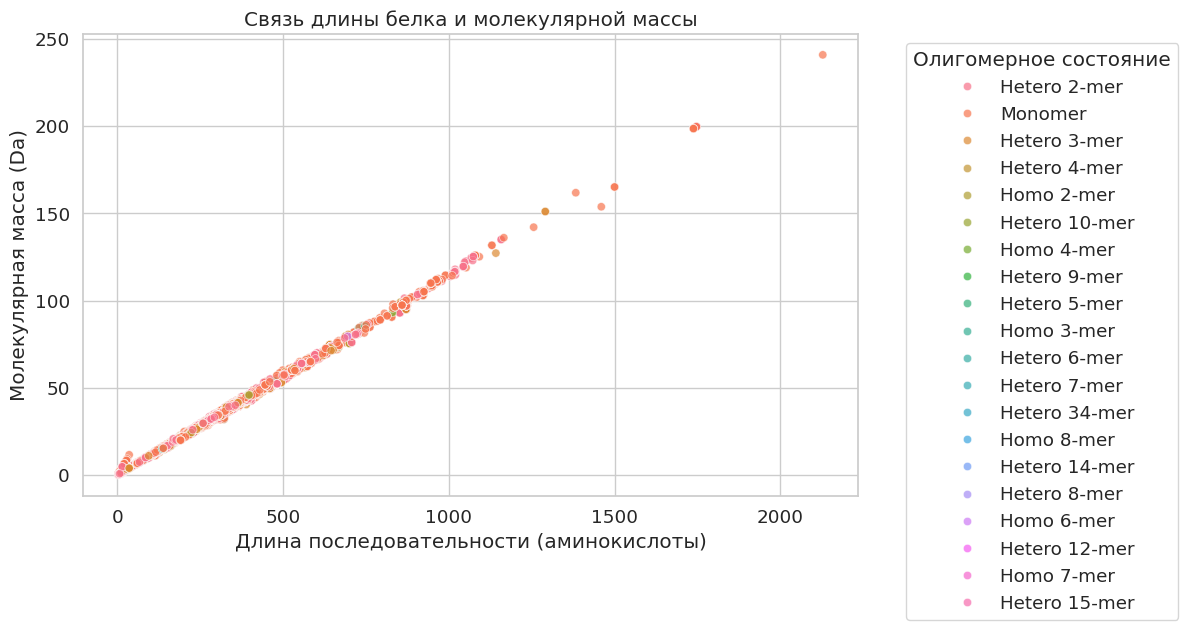

In [45]:
sns.scatterplot(
    data=df,
    x='Polymer Entity Sequence Length',
    y='Molecular Weight (Entity)',
    hue='Oligomeric State',
    alpha=0.7
)
plt.title("Связь длины белка и молекулярной массы")
plt.xlabel("Длина последовательности (аминокислоты)")
plt.ylabel("Молекулярная масса (Da)")
plt.legend(title="Олигомерное состояние", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Все взаимосвязи между основными числовыми признаками** (надписи сокращены для более красивой визуализации)

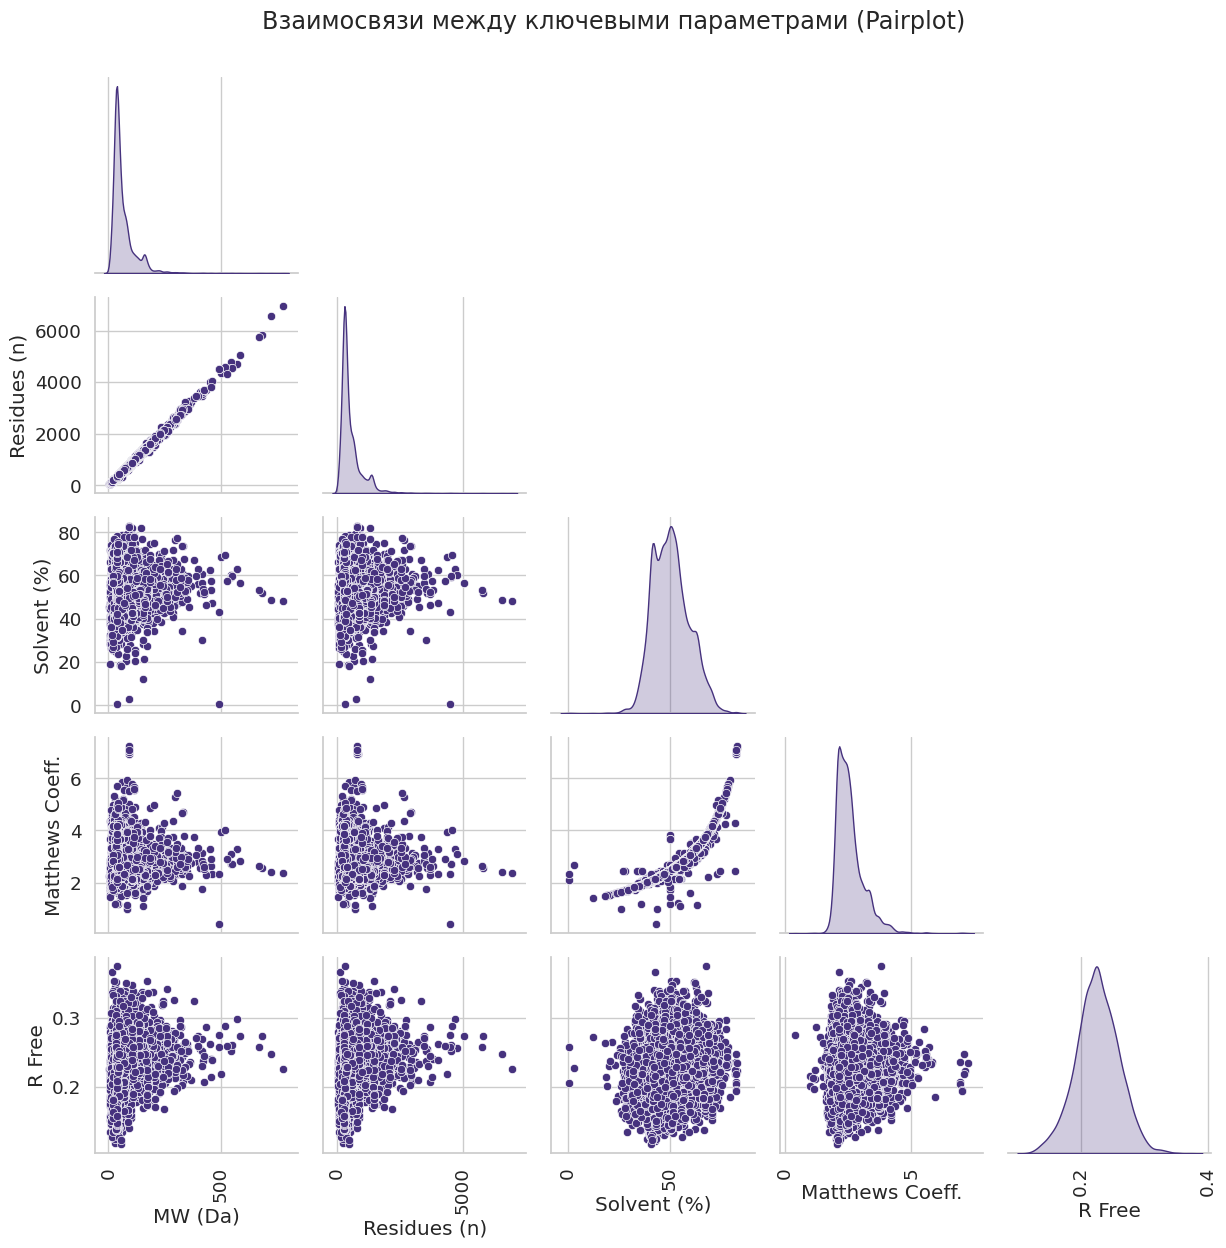

In [57]:
short_names = {
    'Molecular Weight per Deposited Model': 'MW (Da)',
    'Total Number of Polymer Residues per Deposited Model': 'Residues (n)',
    'Percent Solvent Content': 'Solvent (%)',
    'Matthews Coefficient': 'Matthews Coeff.',
    'R Free': 'R Free'
}

df_plot = df[['Molecular Weight per Deposited Model',
              'Total Number of Polymer Residues per Deposited Model',
              'Percent Solvent Content',
              'Matthews Coefficient',
              'R Free']].rename(columns=short_names)
g = sns.pairplot(
    df_plot,
    diag_kind='kde',
    corner=True
)
for ax in g.axes[-1, :]:
    ax.tick_params(axis='x', rotation=90)

plt.suptitle("Взаимосвязи между ключевыми параметрами (Pairplot)", y=1)
plt.tight_layout()
plt.show()

**Зависимость между размерами белков и качеством кристаллографических данных**

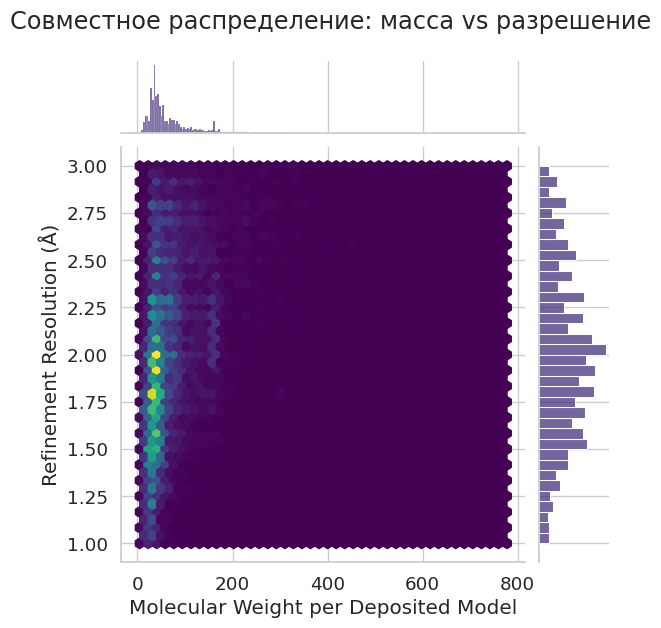

In [47]:
sns.jointplot(
    data=df,
    x='Molecular Weight per Deposited Model',
    y='Refinement Resolution (Å)',
    kind='hex',
    cmap='viridis'
)
plt.suptitle("Совместное распределение: масса vs разрешение", y=1.05)
plt.show()


Структуры с молекулярной массой до 200 кДа доминируют в датасете и имеют наилучшее разрешение (1.0–2.0 Å). С увеличением массы разрешение ухудшается.